In [24]:
import matplotlib.pyplot as plt

In [1]:
import pandas as pd
import numpy as np
import re
import nltk

from datetime import datetime
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk import PorterStemmer, LancasterStemmer, SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk.tokenize import sent_tokenize

from nltk.sentiment.vader import SentimentIntensityAnalyzer

from sklearn.feature_extraction.text import CountVectorizer
import datetime

In [155]:
import warnings
warnings.filterwarnings('ignore')


In [2]:
df_all = pd.read_csv('/Users/cxy/Desktop/data_with_content.csv')
df_all.head()

,review_id,time,seller_name,product_name,product_variation,review_content,customer_name_full,customer_name_anonymous,review_stars
0,1,2021-02-04 21:57:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Pink,Gooood delivery thanks seller!! Box is kinda c...,NaN,k*****i,5
1,2,2021-02-17 00:28:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Ordered on 6th, rec'd parcel on 10 Feb at 11.3...",NaN,w*****4,3
2,3,2021-02-10 14:21:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Fast delivery! First time buying, it’s all wel...",NaN,j*****g,4
3,4,2021-02-16 00:57:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Pink,Ordered for the 3rd time because the elastic b...,helloimhc21,NaN,5
4,5,2021-02-10 11:25:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Local shipping was quite fast. \n2nd purchase ...,NaN,h*****h,5


In [4]:
# Compute sentiment score
SIA = SentimentIntensityAnalyzer()
df_all['sentiment_score_dicts']=df_all.review_content.apply(lambda x: SIA.polarity_scores(x))

In [6]:
compound_score = [None]* len(df_all.sentiment_score_dicts)

In [9]:
for i in range(len(df_all.sentiment_score_dicts)):
    compound_score[i] = df_all.sentiment_score_dicts[i].get('compound')

In [10]:
df_all['compound_score'] = compound_score

In [11]:
df_all.head()

,review_id,time,seller_name,product_name,product_variation,review_content,customer_name_full,customer_name_anonymous,review_stars,sentiment_score_dicts,compound_score
0,1,2021-02-04 21:57:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Pink,Gooood delivery thanks seller!! Box is kinda c...,NaN,k*****i,5,"{'neg': 0.169, 'neu': 0.748, 'pos': 0.083, 'co...",-0.4545
1,2,2021-02-17 00:28:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Ordered on 6th, rec'd parcel on 10 Feb at 11.3...",NaN,w*****4,3,"{'neg': 0.169, 'neu': 0.755, 'pos': 0.076, 'co...",-0.5924
2,3,2021-02-10 14:21:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Fast delivery! First time buying, it’s all wel...",NaN,j*****g,4,"{'neg': 0.0, 'neu': 0.924, 'pos': 0.076, 'comp...",0.3382
3,4,2021-02-16 00:57:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Pink,Ordered for the 3rd time because the elastic b...,helloimhc21,NaN,5,"{'neg': 0.0, 'neu': 0.891, 'pos': 0.109, 'comp...",0.4023
4,5,2021-02-10 11:25:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Local shipping was quite fast. \n2nd purchase ...,NaN,h*****h,5,"{'neg': 0.058, 'neu': 0.73, 'pos': 0.212, 'com...",0.7340


In [13]:
df_all['month_year'] = pd.to_datetime(df_all['time']).dt.to_period('M')

In [17]:
df_sentiment = df_all.groupby([df_all['month_year']],).mean()
df_sentiment.head()

,review_id,review_stars,compound_score
month_year,,,
2020-01,17301.200000,5.000000,0.787980
2020-02,17459.485714,5.000000,0.627774
2020-03,17378.800000,4.975000,0.565470
2020-04,17069.091954,4.839080,0.626579
2020-05,16323.333333,4.897727,0.571114


# Word Cloud of Negative Reviews by Month

In [25]:
df_neg = pd.read_excel('/Users/cxy/Desktop/data_with_content_below4_negative.xlsx')

In [32]:
df_neg['month_year'] = pd.to_datetime(df_neg['time']).dt.to_period('M')

In [33]:
df_neg.head(3)

,review_id,time,seller_name,product_name,product_variation,review_content,customer_name_full,customer_name_anonymous,review_stars,Bad Delivery,Product,Customer Service,month_year
0,2,2021-02-17 00:28:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Ordered on 6th, rec'd parcel on 10 Feb at 11.3...",NaN,w*****4,3,1.0,NaN,1.0,2021-02
1,12,2021-02-08 21:23:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Fast delivery. Box dented. Quality is thin. I ...,NaN,n*****4,3,1.0,1.0,NaN,2021-02
2,13,2021-02-12 11:39:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Second purchase the mask.. so disappointed not...,NaN,s*****l,2,NaN,1.0,NaN,2021-02


In [27]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS

pos_stopwords = {'acceptable', 'comfortable', 'fast', 'fast delivery', 'fine', 'good', 'great', 'happy', 'like', 'love', 'luckily', 'nice', 'nicely', 'ok', 'okay', 
                 'pretty', 'recommend', 'recommended', 'thank', 'thanks', 'well'} 

neu_stopwords = {'abit', 'actually', 'already', 'although', 'also', 'better', 'bit', 'boxes', 'bought', 'buy', 'came', 'come', 'compared', 'condition', 'day', 
                 'delivered', 'due', 'enough', 'expected', 'even', 'face', 'feel', 'feels', 'find', 'first', 'fit', 'get', 'give', 'given', 'got', 'inside', 
                 'instead', 'it', 'item', 'items', 'hope', 'know','mask', 'masks', 'may', 'me', 'much', 'n', 'nan', 'need', 'next', 'one', 'order', 'ordered', 
                 'overall', 'pc', 'please', 'ply','purchase', 'purchased', 'put', 'quite', 'really', 'review', 's', 'see', 'seem', 'seems', 'seller', 'side', 
                 'slightly', 'star', 'stars', 'still', 'super','sure', 'there', 'though', 'took', 'tried', 'try', 'u', 'use', 'using', 'way', 'will', 'within', 
                 'would', 'yet'}

for word in pos_stopwords:
    stopwords = STOPWORDS.add(word)
    
for word in neu_stopwords:
    stopwords = STOPWORDS.add(word)

In [29]:
import string

def combine_text(df, column):
    text = ''
    for i, row in enumerate(df[column]):
        text += (' ' + row)
    text = ' '.join([w.lower().strip(string.punctuation) for w in text.split()])
    return text

def get_wordcloud(text):
    wordcloud = WordCloud(
        background_color="white", 
        width=1500,              
        height=960,              
        margin=10, 
        stopwords=stopwords
        ).generate(text)
    fig, ax = plt.subplots(figsize=(10, 8))    
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

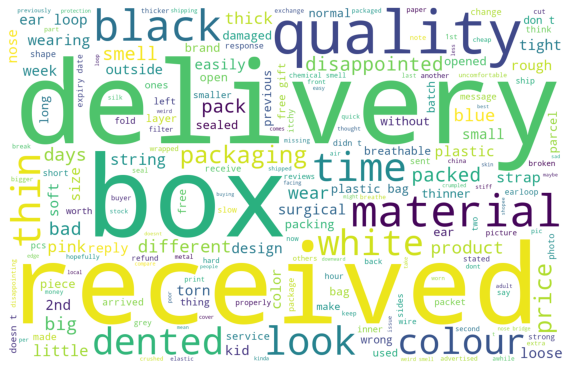

In [31]:
get_wordcloud(combine_text(df_neg, 'review_content')) 

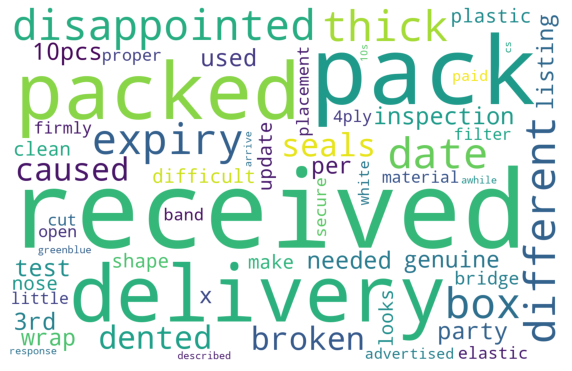

In [35]:
df_April20 = df_neg[df_neg['month_year']=='2020-04']
get_wordcloud(combine_text(df_April20,'review_content'))

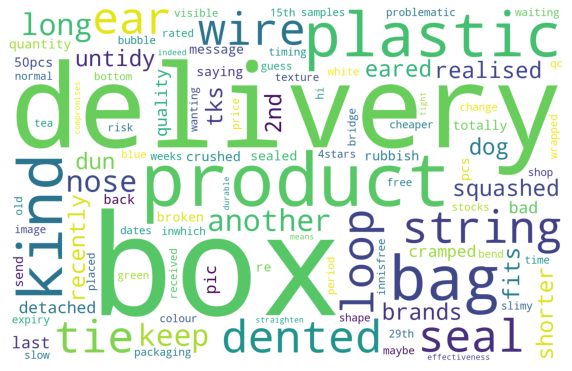

In [36]:
df_May20 = df_neg[df_neg['month_year']=='2020-05']
get_wordcloud(combine_text(df_May20,'review_content'))

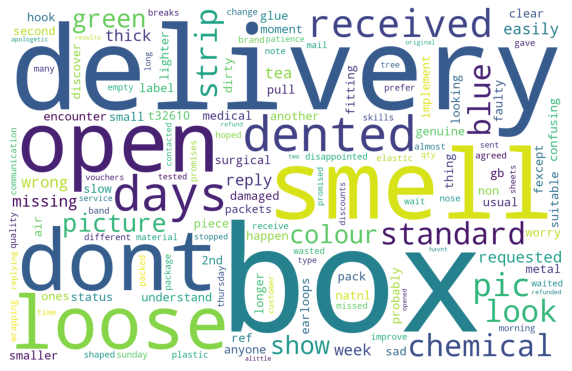

In [38]:
df_June20 = df_neg[df_neg['month_year']=='2020-06']
get_wordcloud(combine_text(df_June20,'review_content'))

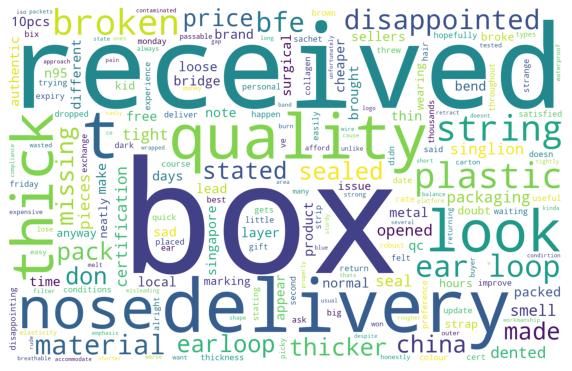

In [40]:
df_July20 = df_neg[df_neg['month_year']=='2020-07']
get_wordcloud(combine_text(df_July20,'review_content'))

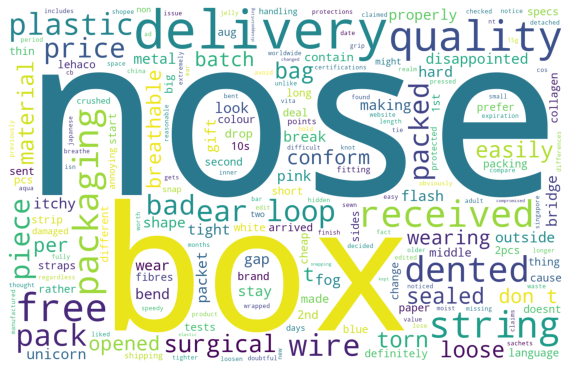

In [41]:
df_Aug20 = df_neg[df_neg['month_year']=='2020-08']
get_wordcloud(combine_text(df_Aug20,'review_content'))

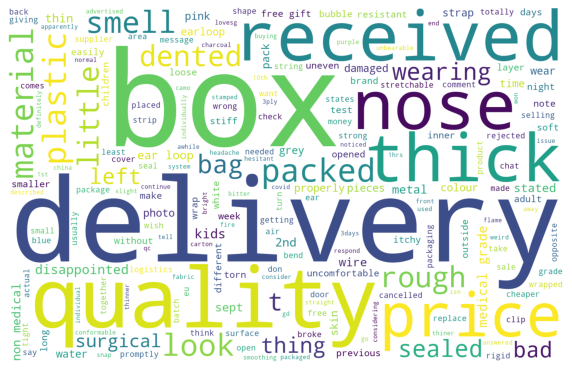

In [42]:
df_Sep20 = df_neg[df_neg['month_year']=='2020-09']
get_wordcloud(combine_text(df_Sep20,'review_content'))

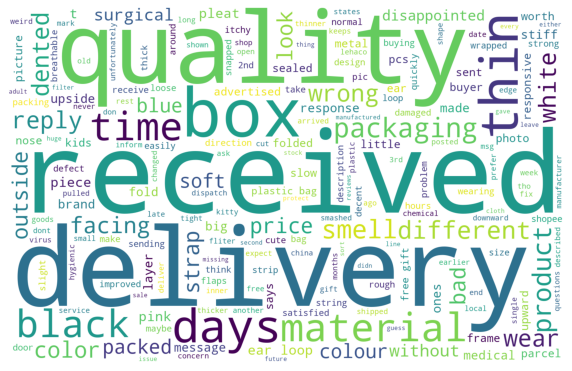

In [43]:
df_Oct20 = df_neg[df_neg['month_year']=='2020-10']
get_wordcloud(combine_text(df_Oct20,'review_content'))

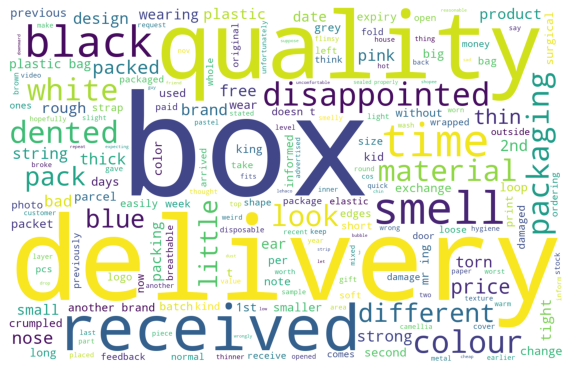

In [44]:
df_Nov20 = df_neg[df_neg['month_year']=='2020-11']
get_wordcloud(combine_text(df_Nov20,'review_content'))

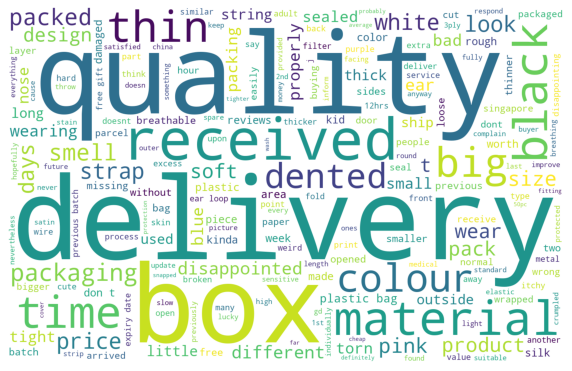

In [45]:
df_Dec20 = df_neg[df_neg['month_year']=='2020-12']
get_wordcloud(combine_text(df_Dec20,'review_content'))

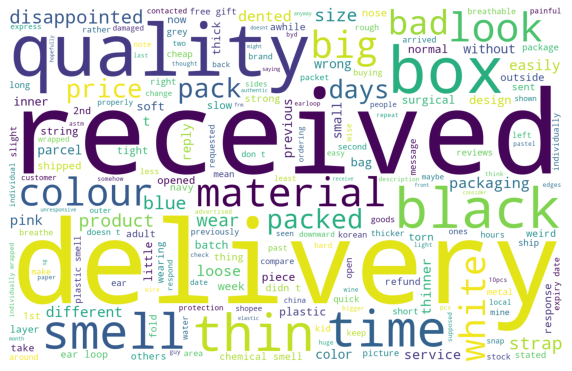

In [39]:
df_Jan21 = df_neg[df_neg['month_year']=='2021-01']
get_wordcloud(combine_text(df_Jan21,'review_content'))

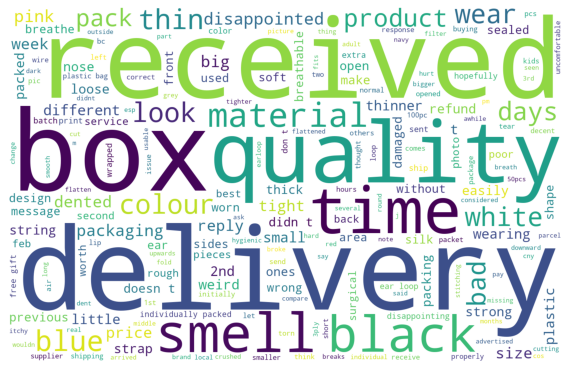

In [46]:
df_Feb21 = df_neg[df_neg['month_year']=='2021-02']
get_wordcloud(combine_text(df_Feb21,'review_content'))

# Covid Data

In [310]:
covid = pd.read_csv('/Users/cxy/Desktop/covid_data.csv')
covid=covid.dropna(axis=0, how='all')
covid['month_year'] = pd.to_datetime(covid['Date']).dt.to_period('M')
covid.head(3)

,Date,Daily Confirmed,False Positives Found,Cumulative Confirmed,Daily Discharged,Passed but not due to COVID,Cumulative Discharged,Discharged to Isolation,Still Hospitalised,Daily Deaths,...,Daily Local transmission,Local cases residing in dorms MOH report,Local cases not residing in doms MOH report,Intensive Care Unit (ICU),General Wards MOH report,In Isolation MOH report,Total Completed Isolation MOH report,Total Hospital Discharged MOH report,Unnamed: 21,month_year
0,2020-01-23,1.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2020-01
1,2020-01-24,2.0,NaN,3.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2020-01
2,2020-01-25,1.0,NaN,4.0,0.0,0.0,0.0,0.0,4.0,0.0,...,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,2020-01


In [311]:
covid=covid[['Daily Confirmed ', 'Date', 'month_year']]
covid.head(3)

,Daily Confirmed,Date,month_year
0,1.0,2020-01-23,2020-01
1,2.0,2020-01-24,2020-01
2,1.0,2020-01-25,2020-01


In [312]:
covid_month = covid.groupby([covid['month_year']],).sum()
covid_month

,Daily Confirmed
month_year,
2020-01,16.0
2020-02,86.0
2020-03,824.0
2020-04,15243.0
2020-05,18750.0
2020-06,9023.0
2020-07,8300.0
2020-08,4607.0
2020-09,996.0


In [327]:
covid_sentiment=pd.concat([covid_month, df_sentiment['compound_score']],axis=1)
covid_sentiment=covid_sentiment.iloc[:-2,:]
time = covid_sentiment.index
covid_sentiment['time']=time
covid_sentiment

,Daily Confirmed,compound_score,time
month_year,,,
2020-01,16.0,0.787980,2020-01
2020-02,86.0,0.627774,2020-02
2020-03,824.0,0.565470,2020-03
2020-04,15243.0,0.626579,2020-04
2020-05,18750.0,0.571114,2020-05
2020-06,9023.0,0.597543,2020-06
2020-07,8300.0,0.544019,2020-07
2020-08,4607.0,0.571496,2020-08
2020-09,996.0,0.541991,2020-09


# Covid Cases & Sentiment Score by Aspects

## Delivery

In [184]:
df_neg['Delivery_score']=df_neg.loc[df_neg['Bad Delivery'] == 1].review_content.apply(lambda x: SIA.polarity_scores(x))

In [185]:
df_delivery = df_neg.dropna(subset=['Delivery_score'])

In [186]:
df_delivery.head(3)

,review_id,time,seller_name,product_name,product_variation,review_content,customer_name_full,customer_name_anonymous,review_stars,Bad Delivery,Product,Customer Service,month_year,Delivery_score,Product_score
0,2,2021-02-17 00:28:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Ordered on 6th, rec'd parcel on 10 Feb at 11.3...",NaN,w*****4,3,1.0,NaN,1.0,2021-02,"{'neg': 0.169, 'neu': 0.755, 'pos': 0.076, 'co...",NaN
1,12,2021-02-08 21:23:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Fast delivery. Box dented. Quality is thin. I ...,NaN,n*****4,3,1.0,1.0,NaN,2021-02,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...","{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp..."
5,31,2021-02-04 15:32:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Delivery was ok. Box came dented all over but ...,norajfr,NaN,4,1.0,1.0,NaN,2021-02,"{'neg': 0.072, 'neu': 0.516, 'pos': 0.412, 'co...","{'neg': 0.072, 'neu': 0.516, 'pos': 0.412, 'co..."


In [187]:
delivery_sentiment=[None]*(len(df_delivery.Delivery_score))

In [188]:
for i in range(len(df_delivery.Delivery_score)):
    delivery_sentiment[i] = df_delivery.Delivery_score.iloc[i].get('compound')

In [189]:
df_delivery['compound_score'] = delivery_sentiment

In [377]:
delivery=df_delivery.groupby([df_delivery['month_year']],).mean()

In [378]:
delivery=delivery.iloc[1:,:]
delivery

,review_id,review_stars,Bad Delivery,Product,Customer Service,compound_score
month_year,,,,,,
2020-04,16133.000000,2.500000,1.0,1.0,NaN,0.148000
2020-05,16014.833333,3.000000,1.0,1.0,1.0,0.033983
2020-06,16193.800000,4.000000,1.0,NaN,NaN,0.012680
2020-07,27035.090909,3.363636,1.0,1.0,1.0,-0.115273
2020-08,30118.105263,3.473684,1.0,1.0,1.0,0.238674
2020-09,29567.607143,3.750000,1.0,1.0,1.0,0.178204
2020-10,22480.588235,3.676471,1.0,1.0,1.0,0.265744
2020-11,21630.250000,3.562500,1.0,1.0,1.0,0.189517
2020-12,13130.459016,3.344262,1.0,1.0,1.0,0.143039


Text(0.5, 1.0, 'Delivery')

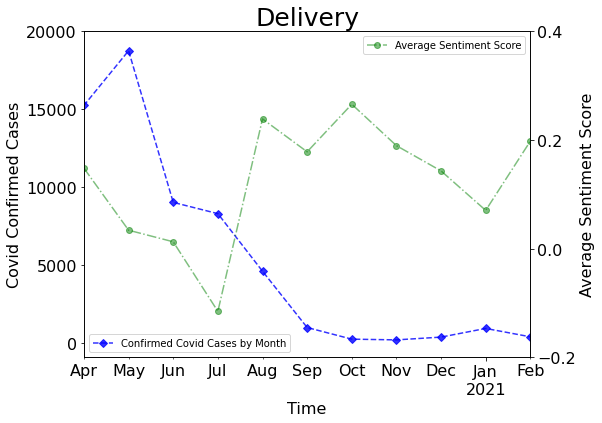

In [379]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
covid_sentiment['Daily Confirmed '].plot(ax=ax1,style='bD--',alpha=0.8,label='Confirmed Covid Cases by Month', fontsize=16)
plt.xlabel('Time', fontsize=16)             
ax1.set_yticks(np.arange(0,20001,5000))        
ax1.set_ylabel('Covid Confirmed Cases', fontsize=16)                  
plt.legend(loc='lower left') 

ax2 = ax1.twinx()
delivery['compound_score'].plot(ax=ax2,style='go-.',alpha=0.5,label='Average Sentiment Score', fontsize=16)
ax2.set_yticks(np.arange(-0.2,0.5,0.2))    
ax2.set_ylabel('Average Sentiment Score', fontsize=16)       
plt.legend(loc='upper right')               

ax1.set_title('Delivery', fontsize=25)  

## Product

In [200]:
df_neg['Product_score']=df_neg.loc[df_neg['Product'] == 1].review_content.apply(lambda x: SIA.polarity_scores(x))

In [170]:
df_product= df_neg.dropna(subset=['Product_score'])
print(df_product.shape)
df_product.head(3)

(1025, 15)


,review_id,time,seller_name,product_name,product_variation,review_content,customer_name_full,customer_name_anonymous,review_stars,Bad Delivery,Product,Customer Service,month_year,Delivery_score,Product_score
1,12,2021-02-08 21:23:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Fast delivery. Box dented. Quality is thin. I ...,NaN,n*****4,3,1.0,1.0,NaN,2021-02,"{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp...","{'neg': 0.189, 'neu': 0.811, 'pos': 0.0, 'comp..."
2,13,2021-02-12 11:39:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Second purchase the mask.. so disappointed not...,NaN,s*****l,2,NaN,1.0,NaN,2021-02,NaN,"{'neg': 0.266, 'neu': 0.734, 'pos': 0.0, 'comp..."
3,14,2021-02-16 16:38:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult White,Received within a few days. However it is not ...,NaN,h*****i,3,NaN,1.0,NaN,2021-02,NaN,"{'neg': 0.0, 'neu': 0.927, 'pos': 0.073, 'comp..."


In [172]:
product_sentiment=[None]*(len(df_product.Product_score))

for i in range(len(df_product.Product_score)):
    product_sentiment[i] = df_product.Product_score.iloc[i].get('compound')
    
df_product['compound_score'] = product_sentiment
product=df_product.groupby([df_product['month_year']],).mean()

In [173]:
product

,review_id,review_stars,Bad Delivery,Product,Customer Service,compound_score
month_year,,,,,,
2020-04,15107.500000,3.500000,1.0,1.0,NaN,0.477900
2020-05,15475.000000,3.142857,1.0,1.0,NaN,-0.050086
2020-06,13037.200000,3.400000,NaN,1.0,1.0,-0.014167
2020-07,19241.486486,3.081081,1.0,1.0,NaN,-0.118865
2020-08,18294.500000,2.979167,1.0,1.0,1.0,0.073194
2020-09,20901.684932,3.260274,1.0,1.0,1.0,0.053453
2020-10,26559.787234,3.202128,1.0,1.0,1.0,0.084545
2020-11,25269.702128,3.226950,1.0,1.0,1.0,0.150301
2020-12,17570.363636,3.262032,1.0,1.0,1.0,0.110005


Text(0.5, 1.0, 'Product')

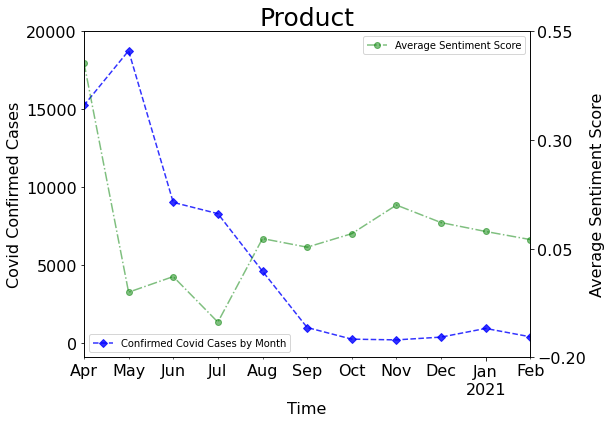

In [364]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
covid_sentiment['Daily Confirmed '].plot(ax=ax1,style='bD--',alpha=0.8,label='Confirmed Covid Cases by Month', fontsize=16)
plt.xlabel('Time', fontsize=16)             
ax1.set_yticks(np.arange(0,20001,5000))        
ax1.set_ylabel('Covid Confirmed Cases', fontsize=16)                  
plt.legend(loc='lower left') 

ax2 = ax1.twinx()
product['compound_score'].plot(ax=ax2,style='go-.',alpha=0.5,label='Average Sentiment Score', fontsize=16)
ax2.set_yticks(np.arange(-0.2,0.6,0.25))    
ax2.set_ylabel('Average Sentiment Score',fontsize=16)       
plt.legend(loc='upper right')               

ax1.set_title('Product', fontsize=25)  

## Service

In [201]:
df_neg['Service_score']=df_neg.loc[df_neg['Customer Service'] == 1].review_content.apply(lambda x: SIA.polarity_scores(x))

In [202]:
df_service= df_neg.dropna(subset=['Service_score'])
print(df_service.shape)
df_service.head(3)

(326, 17)


,review_id,time,seller_name,product_name,product_variation,review_content,customer_name_full,customer_name_anonymous,review_stars,Bad Delivery,Product,Customer Service,month_year,Delivery_score,Product_score,Customer_score,Service_score
0,2,2021-02-17 00:28:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,"Ordered on 6th, rec'd parcel on 10 Feb at 11.3...",NaN,w*****4,3,1.0,NaN,1.0,2021-02,"{'neg': 0.169, 'neu': 0.755, 'pos': 0.076, 'co...",NaN,"{'neg': 0.169, 'neu': 0.755, 'pos': 0.076, 'co...","{'neg': 0.169, 'neu': 0.755, 'pos': 0.076, 'co..."
4,23,2021-01-09 17:46:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Took 3 days to arrived. Unresponsive and rejec...,NaN,i*****9,3,NaN,1.0,1.0,2021-01,NaN,"{'neg': 0.173, 'neu': 0.735, 'pos': 0.093, 'co...","{'neg': 0.173, 'neu': 0.735, 'pos': 0.093, 'co...","{'neg': 0.173, 'neu': 0.735, 'pos': 0.093, 'co..."
10,50,2021-02-03 21:53:00,ezlifesg,Local Ready Stock 3 PLY Disposable Face Masks ...,Adult Black,Looks good! Worth the money. Quality seems goo...,NaN,p*****n,1,NaN,1.0,1.0,2021-02,NaN,"{'neg': 0.056, 'neu': 0.752, 'pos': 0.192, 'co...","{'neg': 0.056, 'neu': 0.752, 'pos': 0.192, 'co...","{'neg': 0.056, 'neu': 0.752, 'pos': 0.192, 'co..."


In [203]:
service_sentiment=[None]*(len(df_service.Service_score))

for i in range(len(df_service.Service_score)):
    service_sentiment[i] = df_service.Service_score.iloc[i].get('compound')
    
df_service['compound_score'] = service_sentiment
service=df_service.groupby([df_service['month_year']],).mean()

In [206]:
service

,review_id,review_stars,Bad Delivery,Product,Customer Service,compound_score
month_year,,,,,,
2020-04,15539.000000,4.000000,NaN,NaN,1.0,-0.227200
2020-05,14063.333333,2.333333,1.0,NaN,1.0,-0.266200
2020-06,16572.000000,3.142857,NaN,1.0,1.0,-0.060186
2020-07,14051.250000,3.250000,1.0,NaN,1.0,0.007050
2020-08,18613.454545,3.181818,1.0,1.0,1.0,-0.089755
2020-09,25211.800000,3.066667,1.0,1.0,1.0,0.219507
2020-10,24192.621622,3.081081,1.0,1.0,1.0,-0.069019
2020-11,30015.180000,3.140000,1.0,1.0,1.0,0.125164
2020-12,19845.317460,3.317460,1.0,1.0,1.0,0.177822


Text(0.5, 1.0, 'Service')

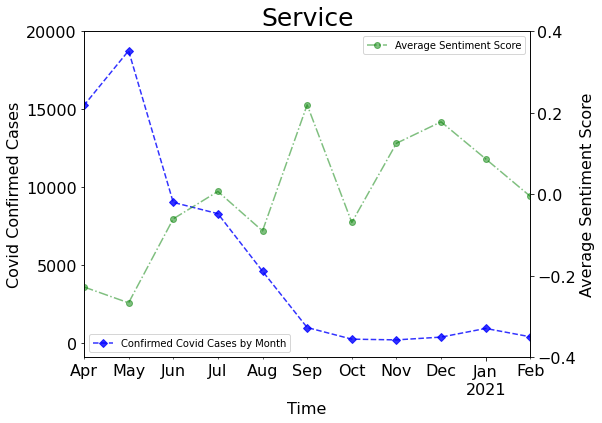

In [366]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)

covid_sentiment['Daily Confirmed '].plot(ax=ax1,style='bD--',alpha=0.8,label='Confirmed Covid Cases by Month', fontsize=16)
plt.xlabel('Time', fontsize=16)             
ax1.set_yticks(np.arange(0,20001,5000))        
ax1.set_ylabel('Covid Confirmed Cases', fontsize=16)                  
plt.legend(loc='lower left') 

ax2 = ax1.twinx()
service['compound_score'].plot(ax=ax2,style='go-.',alpha=0.5,label='Average Sentiment Score', fontsize=16)
ax2.set_yticks(np.arange(-0.4,0.5,0.2))    
ax2.set_ylabel('Average Sentiment Score',fontsize=16)       
plt.legend(loc='upper right')                

ax1.set_title('Service', fontsize=25)  

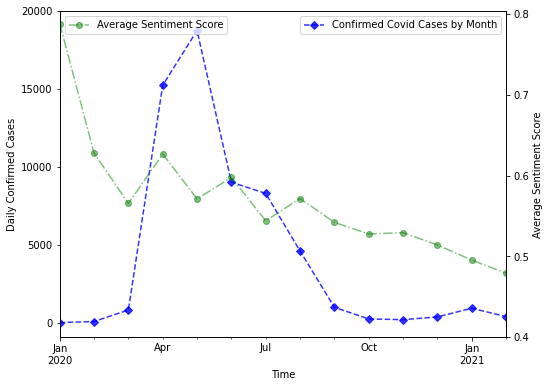

In [332]:
fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(111)
covid_sentiment['Daily Confirmed '].plot(ax=ax1,style='bD--',alpha=0.8,label='Confirmed Covid Cases by Month')

plt.xlabel('Time')             
ax1.set_yticks(np.arange(0,20001,5000))        
ax1.set_ylabel('Daily Confirmed Cases')                  
plt.legend(loc=1) 

ax2 = ax1.twinx()
covid_sentiment['compound_score'].plot(ax=ax2,style='go-.',alpha=0.5,label='Average Sentiment Score')
ax2.set_yticks(np.arange(0.4,0.81,0.1))    
ax2.set_ylabel('Average Sentiment Score')       
plt.legend(loc=2)                

# Aspect-based Average Sentiment Scores

<Figure size 432x288 with 0 Axes>

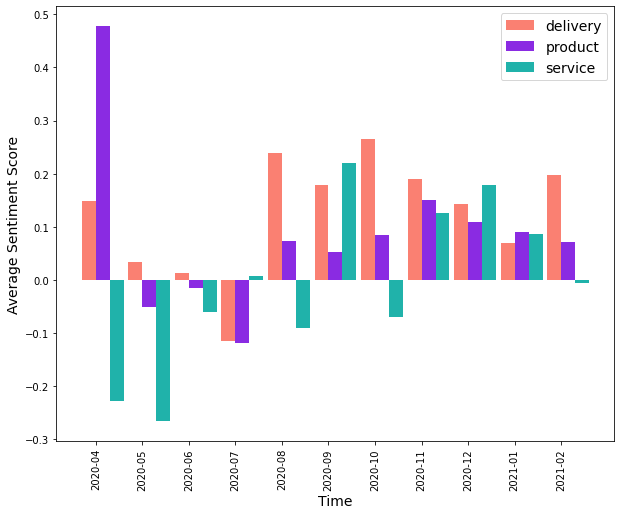

In [397]:

x=np.arange(11)
y1=delivery['compound_score']
y2=product['compound_score']
y3=service['compound_score']

bar_width=0.3
tick_label=delivery.index

fig = plt.figure()
plt.figure(figsize=(10, 8))

plt.bar(x,y1,bar_width,color='salmon',label='delivery')
plt.bar(x+bar_width,y2,bar_width,color='blueviolet',label='product')
plt.bar(x+bar_width*2,y3,bar_width,color='lightseagreen',label='service')

plt.legend(fontsize=14)
plt.xticks(x+bar_width/2,tick_label,rotation='vertical')
plt.xlabel('Time', fontsize=14)
plt.ylabel('Average Sentiment Score',fontsize=14)
plt.show()
